# Trafic Light Classifier Simulator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))
#set_session(tf.Session(config=config))

## 1. Import Images from Data/Simulator...

In [2]:
X_train = []
x_label = []
for img_class, directory in enumerate(['data/sim_red', 'data/sim_yellow', 'data/sim_green', 'data/sim_none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)

        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,64))

        X_train.append(resized/255.)
        x_label.append(img_class)
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [4]:
print(X_train.shape)
X_train

(367, 64, 32, 3)


array([[[[0.56470588, 0.69019608, 0.84313725],
         [0.56470588, 0.69019608, 0.84313725],
         [0.56470588, 0.69019608, 0.84313725],
         ...,
         [0.56078431, 0.68627451, 0.83921569],
         [0.56078431, 0.68627451, 0.83921569],
         [0.56078431, 0.68627451, 0.83921569]],

        [[0.56470588, 0.69019608, 0.84313725],
         [0.56470588, 0.69019608, 0.84313725],
         [0.56470588, 0.69019608, 0.84313725],
         ...,
         [0.56078431, 0.68627451, 0.83921569],
         [0.56078431, 0.68627451, 0.83921569],
         [0.56078431, 0.68627451, 0.83921569]],

        [[0.56862745, 0.69411765, 0.84705882],
         [0.56862745, 0.69411765, 0.84705882],
         [0.56862745, 0.69411765, 0.84705882],
         ...,
         [0.56470588, 0.69019608, 0.84313725],
         [0.56470588, 0.69019608, 0.84313725],
         [0.56470588, 0.69019608, 0.84313725]],

        ...,

        [[0.65490196, 0.78431373, 0.89803922],
         [0.65490196, 0.78823529, 0.89803922]

In [5]:
print(x_label.shape)
x_label

(367,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 2. Build CNN

In [6]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras import losses, optimizers, regularizers

In [8]:
categorical_labels = tf.keras.utils.to_categorical(x_label)  # https://keras.io/utils/#to_categorical
num_classes = 4
model = keras.models.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.8)
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.8)
model.add(Flatten())
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 8, 32)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 32776     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 3

In [9]:
model.fit(X_train, categorical_labels, batch_size=128, epochs=30, verbose=True, validation_split=0.1, shuffle=True)

Train on 330 samples, validate on 37 samples
Epoch 1/30
330/330 [==============================] - 1s 4ms/sample - loss: 1.7252 - accuracy: 0.2515 - val_loss: 1.7480 - val_accuracy: 0.0000e+00
Epoch 2/30
330/330 [==============================] - 0s 1ms/sample - loss: 1.6534 - accuracy: 0.3545 - val_loss: 1.8583 - val_accuracy: 0.0000e+00
Epoch 3/30
330/330 [==============================] - 0s 1ms/sample - loss: 1.5987 - accuracy: 0.3515 - val_loss: 1.9052 - val_accuracy: 0.0000e+00
Epoch 4/30
330/330 [==============================] - 0s 1ms/sample - loss: 1.5507 - accuracy: 0.3636 - val_loss: 1.8445 - val_accuracy: 0.0000e+00
Epoch 5/30
330/330 [==============================] - 0s 1ms/sample - loss: 1.4991 - accuracy: 0.4727 - val_loss: 1.8073 - val_accuracy: 0.0000e+00
Epoch 6/30
330/330 [==============================] - 0s 1ms/sample - loss: 1.4503 - accuracy: 0.4697 - val_loss: 1.7962 - val_accuracy: 0.0000e+00
Epoch 7/30
330/330 [==============================] - 0s 1ms/sample

In [10]:
score = model.evaluate(X_train, categorical_labels, verbose=True)
print(score)

367/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

367/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
%matplotlib inline
fig = plt.figure()
import operator

LABELS = list(enumerate(['Red', 'Yellow', 'Green', 'None']))

def read_prediction(predictions):
    index, value = max(enumerate(predictions), key=operator.itemgetter(1))
    print('Max prediction score', value)
    print('Predicted label: ', LABELS[index][1])
    
def read_label(example_image_id):
    print(prediction[example_image_id])
    print('Ground truth label: ', print_label(categorical_labels[example_image_id]))
    read_prediction(prediction[example_image_id])
    plt.imshow(X_train[example_image_id])  
    
def print_label(categorical_label):
    color = ''
    for i in range(categorical_label.shape[0]):
        if categorical_label[i] == 1.0:           
            color = LABELS[i][1]
            if color != '': return color
        else:
            color = 'None'
    return color    

<Figure size 432x288 with 0 Axes>

In [13]:
import h5py # needed for saving model
model.save('tl_classifier_sim.h5')

[0.9636571  0.027533   0.00587209 0.00293791]
Ground truth label:  Red
Max prediction score 0.9636571
Predicted label:  Red


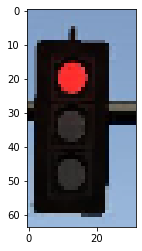

In [23]:
read_label(32)

[0.00197102 0.9879893  0.00212642 0.00791327]
Ground truth label:  Yellow
Max prediction score 0.9879893
Predicted label:  Yellow


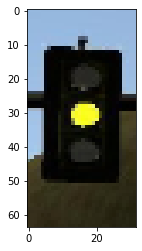

In [22]:
read_label(144)

[0.22039503 0.22920619 0.2846705  0.26572827]
Ground truth label:  Green
Max prediction score 0.2846705
Predicted label:  Green


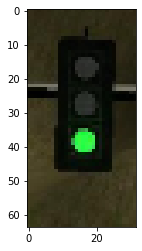

In [21]:
read_label(199)

[0.3388291  0.2943263  0.18970974 0.17713493]
Ground truth label:  None
Max prediction score 0.3388291
Predicted label:  Red


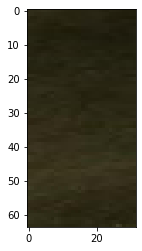

In [19]:
read_label(337)